In [2]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv("clean_ingr_dataset.csv")
df

,Label,brand,name,price,rank,Combination,Dry,Normal,Oily,Sensitive,ingredients
0,Cleanser,ALGENIST,GENIUS Ultimate Anti-Aging Melting Cleanser,38,4.1,0,0,0,0,0,"['c12-15 alkyl benzoate', 'ethylhexyl palmitat..."
1,Cleanser,ALGENIST,Hydrating Essence Toner,25,4.4,0,0,0,0,0,"['water', 'butylene glycol', 'sodium pca', 'wa..."
2,Cleanser,ALGENIST,Multi-Perfecting Detoxifying Exfoliator,38,4.6,0,0,0,0,0,"['water', 'caprylic/capric triglyceride', 'hyd..."
3,Cleanser,AMOREPACIFIC,Treatment Cleansing Foam,50,4.5,1,0,1,1,0,"['water', 'glycerin', 'stearic acid', 'myristi..."
4,Cleanser,AMOREPACIFIC,Treatment Enzyme Peel,60,4.7,1,1,1,1,1,"['mannitol', 'sodium cocoyl glycinate', 'sodiu..."
...,...,...,...,...,...,...,...,...,...,...,...
1421,Treatment,TATA HARPER,Rejuvenating Serum,110,3.7,1,1,1,1,1,"['aloe barbadensis leaf juice', 'water', 'mang..."
1422,Treatment,TATA HARPER,Resurfacing Serum,88,4.2,1,1,1,1,1,"['propanediol', 'water', 'galactoarabinan', 'g..."
1423,Treatment,TATCHA,Luminous Deep Hydration Firming Serum,95,3.8,0,0,0,0,0,"['water', 'glycerin', 'propanediol', 'alcohol'..."
1424,Treatment,VOLITION BEAUTY,Snow Mushroom Water Serum,62,4.7,1,1,1,1,1,"['tremella fuciformis mushroom extract', 'prop..."


In [4]:
skin_mapping = {
    'Dry': 'D',
    'Oily': 'O',
    'Sensitive': 'S',
    'Combination': 'C',
    'Normal': 'N'
}

In [5]:
columns = df[['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]

In [6]:
skintype = df.apply(
    lambda row: ','.join([skin_mapping[col] for col in columns if row[col] == 1])
    or 'NO',
    axis=1
)

In [7]:
skintype

0              NO
1              NO
2              NO
3           C,N,O
4       C,D,N,O,S
          ...    
1421    C,D,N,O,S
1422    C,D,N,O,S
1423           NO
1424    C,D,N,O,S
1425    C,D,N,O,S
Length: 1426, dtype: object

In [8]:
df['skintype'] = skintype

In [9]:
df['skintype'].unique()

array(['NO', 'C,N,O', 'C,D,N,O,S', 'C,D,N,O', 'O,S', 'C,N,O,S', 'C,N',
       'C,D,N,S', 'C,O', 'D,S', 'D,N,S', 'D', 'C,D,N', 'S', 'D,N', 'C,D',
       'C,N,S', 'C,O,S', 'N,S', 'D,O,S', 'N,O', 'D,N,O', 'C,D,S'],
      dtype=object)

In [9]:
df

,Label,brand,name,price,rank,Combination,Dry,Normal,Oily,Sensitive,ingredients,skintype
0,Cleanser,ALGENIST,GENIUS Ultimate Anti-Aging Melting Cleanser,38,4.1,0,0,0,0,0,"['c12-15 alkyl benzoate', 'ethylhexyl palmitat...",NO
1,Cleanser,ALGENIST,Hydrating Essence Toner,25,4.4,0,0,0,0,0,"['water', 'butylene glycol', 'sodium pca', 'wa...",NO
2,Cleanser,ALGENIST,Multi-Perfecting Detoxifying Exfoliator,38,4.6,0,0,0,0,0,"['water', 'caprylic/capric triglyceride', 'hyd...",NO
3,Cleanser,AMOREPACIFIC,Treatment Cleansing Foam,50,4.5,1,0,1,1,0,"['water', 'glycerin', 'stearic acid', 'myristi...","C,N,O"
4,Cleanser,AMOREPACIFIC,Treatment Enzyme Peel,60,4.7,1,1,1,1,1,"['mannitol', 'sodium cocoyl glycinate', 'sodiu...","C,D,N,O,S"
...,...,...,...,...,...,...,...,...,...,...,...,...
1421,Treatment,TATA HARPER,Rejuvenating Serum,110,3.7,1,1,1,1,1,"['aloe barbadensis leaf juice', 'water', 'mang...","C,D,N,O,S"
1422,Treatment,TATA HARPER,Resurfacing Serum,88,4.2,1,1,1,1,1,"['propanediol', 'water', 'galactoarabinan', 'g...","C,D,N,O,S"
1423,Treatment,TATCHA,Luminous Deep Hydration Firming Serum,95,3.8,0,0,0,0,0,"['water', 'glycerin', 'propanediol', 'alcohol'...",NO
1424,Treatment,VOLITION BEAUTY,Snow Mushroom Water Serum,62,4.7,1,1,1,1,1,"['tremella fuciformis mushroom extract', 'prop...","C,D,N,O,S"


In [10]:
df2 = df[['Label', 'name', 'ingredients']]
df2.head()

,Label,name,ingredients
0,Cleanser,GENIUS Ultimate Anti-Aging Melting Cleanser,"['c12-15 alkyl benzoate', 'ethylhexyl palmitat..."
1,Cleanser,Hydrating Essence Toner,"['water', 'butylene glycol', 'sodium pca', 'wa..."
2,Cleanser,Multi-Perfecting Detoxifying Exfoliator,"['water', 'caprylic/capric triglyceride', 'hyd..."
3,Cleanser,Treatment Cleansing Foam,"['water', 'glycerin', 'stearic acid', 'myristi..."
4,Cleanser,Treatment Enzyme Peel,"['mannitol', 'sodium cocoyl glycinate', 'sodiu..."


In [11]:
df2['ingredients'].nunique()

1233

In [12]:
df2['ingredients'] = df2['ingredients'].apply(lambda x: re.sub(r'[\[\]]', '', str(x)).replace("'", "").replace('"', ''))
df2.head()

C:\Users\User\AppData\Local\Temp/ipykernel_364/2841014921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ingredients'] = df2['ingredients'].apply(lambda x: re.sub(r'[\[\]]', '', str(x)).replace("'", "").replace('"', ''))


,Label,name,ingredients
0,Cleanser,GENIUS Ultimate Anti-Aging Melting Cleanser,"c12-15 alkyl benzoate, ethylhexyl palmitate, c..."
1,Cleanser,Hydrating Essence Toner,"water, butylene glycol, sodium pca, water, alg..."
2,Cleanser,Multi-Perfecting Detoxifying Exfoliator,"water, caprylic/capric triglyceride, hydroxyet..."
3,Cleanser,Treatment Cleansing Foam,"water, glycerin, stearic acid, myristic acid, ..."
4,Cleanser,Treatment Enzyme Peel,"mannitol, sodium cocoyl glycinate, sodium laur..."


In [13]:
mlb = MultiLabelBinarizer()

onehotenc = mlb.fit_transform(df2['ingredients'].str.split(', '))
for i, ingr in enumerate(mlb.classes_):
    df2[ingr] = onehotenc[:, i]

df2.drop('ingredients', axis=1, inplace=True)

print(onehotenc.shape)

C:\Users\User\AppData\Local\Temp/ipykernel_364/1844603814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ingr] = onehotenc[:, i]
C:\Users\User\AppData\Local\Temp/ipykernel_364/1844603814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[ingr] = onehotenc[:, i]
C:\Users\User\AppData\Local\Temp/ipykernel_364/1844603814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

(1426, 736)


C:\Users\User\AppData\Local\Temp/ipykernel_364/1844603814.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[ingr] = onehotenc[:, i]
C:\Users\User\AppData\Local\Temp/ipykernel_364/1844603814.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[ingr] = onehotenc[:, i]
C:\Users\User\AppData\Local\Temp/ipykernel_364/1844603814.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

In [14]:
df2.head()

,Label,name,"1,2-hexanediol",3-o-ethyl ascorbic acid,acacia decurrens flower wax,acer saccharum sugar maple extract,acetyl dipeptide-1 cetyl ester,acetyl glucosamine,acetyl hexapeptide-8,acetyl tetrapeptide-5,...,yeast extract,yeast extract/faex/extrait de levure,yellow 5 ci 19140,yellow 6 ci 15985,zea mays corn starch,zinc gluconate,zinc oxide,zinc pca,zinc sulfate,zingiber officinale ginger root extract
0,Cleanser,GENIUS Ultimate Anti-Aging Melting Cleanser,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cleanser,Hydrating Essence Toner,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cleanser,Multi-Perfecting Detoxifying Exfoliator,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cleanser,Treatment Cleansing Foam,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Cleanser,Treatment Enzyme Peel,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [15]:
df2_labels = df2.Label
df2_labels

0        Cleanser
1        Cleanser
2        Cleanser
3        Cleanser
4        Cleanser
          ...    
1421    Treatment
1422    Treatment
1423    Treatment
1424    Treatment
1425    Treatment
Name: Label, Length: 1426, dtype: object

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#df2.iloc[:,2:] = scaler.fit_transform(df2.iloc[:,2:].to_numpy()) # za primjer ako normaliziraš kolone od druge na dalje

In [20]:
df2.head()

,Label,name,"1,2-hexanediol",3-o-ethyl ascorbic acid,acacia decurrens flower wax,acer saccharum sugar maple extract,acetyl dipeptide-1 cetyl ester,acetyl glucosamine,acetyl hexapeptide-8,acetyl tetrapeptide-5,...,yeast extract,yeast extract/faex/extrait de levure,yellow 5 ci 19140,yellow 6 ci 15985,zea mays corn starch,zinc gluconate,zinc oxide,zinc pca,zinc sulfate,zingiber officinale ginger root extract
0,Cleanser,GENIUS Ultimate Anti-Aging Melting Cleanser,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cleanser,Hydrating Essence Toner,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cleanser,Multi-Perfecting Detoxifying Exfoliator,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cleanser,Treatment Cleansing Foam,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Cleanser,Treatment Enzyme Peel,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [16]:
df_data = df2.drop('name', axis=1)
df_data = df_data.drop('Label', axis=1)
df_data.head()

,"1,2-hexanediol",3-o-ethyl ascorbic acid,acacia decurrens flower wax,acer saccharum sugar maple extract,acetyl dipeptide-1 cetyl ester,acetyl glucosamine,acetyl hexapeptide-8,acetyl tetrapeptide-5,achillea millefolium extract,acrylamide/sodium acryloyldimethyltaurate copolymer,...,yeast extract,yeast extract/faex/extrait de levure,yellow 5 ci 19140,yellow 6 ci 15985,zea mays corn starch,zinc gluconate,zinc oxide,zinc pca,zinc sulfate,zingiber officinale ginger root extract
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [17]:
df_data3 = df_data.drop(['water', 'no info'], axis=1)

In [12]:
#df3 = df2['ingredients'].str.get_dummies(', ')
#df3

<AxesSubplot:>

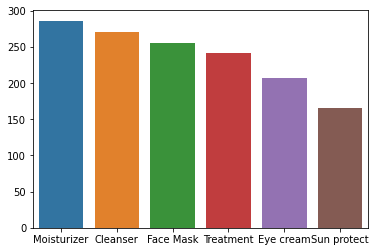

In [19]:
label_counts = df2['Label'].value_counts()

# plot the counts using seaborn's barplot function
sns.barplot(x=label_counts.index, y=label_counts.values)

In [20]:
from sklearn.decomposition import PCA
import numpy as np

In [21]:
pca3 = PCA(n_components=3, random_state=2023) # probaj više razina od 2, 5

#pca3.fit(onehotenc)

#x_pca3 = pca3.transform(onehotenc)

pca_data = pca3.fit_transform(df_data)

print(np.sum(pca3.explained_variance_ratio_)) # vraća postotak koliko si informacije zadržala (više bolje)
print(pca_data.shape)


0.12322176922356406
(1426, 3)


          X         Y         Z    labels
0 -0.327887  0.019898  0.197627  Cleanser
1  0.513932 -0.516939 -0.470842  Cleanser
2  0.902369  -0.72642 -0.240688  Cleanser
3  0.467625  0.072663  0.238455  Cleanser
4   -0.9754   0.00223  0.104878  Cleanser
5 -0.850409  0.415581  1.109503  Cleanser
6  -0.88539 -0.034425 -0.405311  Cleanser
7 -0.383729 -0.058556  0.634658  Cleanser
8 -1.155574  0.425129  0.536263  Cleanser
9 -0.350289  0.136009  0.705816  Cleanser


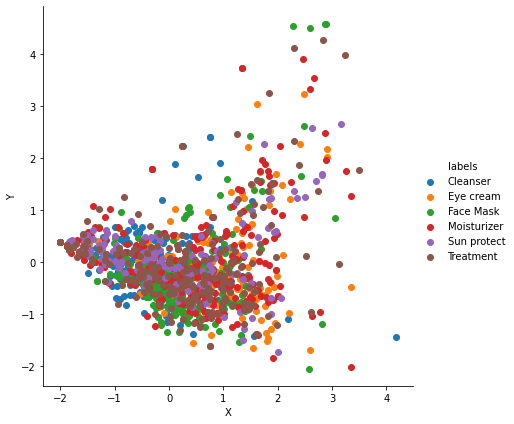

In [22]:
pca_data = np.column_stack((pca_data, df2_labels))

# creating a new data frame for plotting of data points
pca_df = pd.DataFrame(data=pca_data, columns=("X", "Y", "Z", "labels"))
print(pca_df.head(10))
sns.FacetGrid(pca_df, hue="labels", height=6).map(plt.scatter, 'X', 'Y').add_legend()
plt.show()

In [17]:
pca4 = PCA(n_components=4, random_state=2020) # probaj više razina od 2, 5

pca4.fit(onehotenc)

x_pca4 = pca4.transform(onehotenc)

print(np.sum(pca4.explained_variance_ratio_)) # vraća postotak koliko si informacije zadržala (više bolje)


0.14410063214906016


In [18]:
pca5 = PCA(n_components=5, random_state=2020) # probaj više razina od 2, 5

pca5.fit(df_data)

x_pca5 = pca5.transform(df_data)

print(np.sum(pca5.explained_variance_ratio_)) # vraća postotak koliko si informacije zadržala (više bolje)


0.1618567692343553


In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



In [ ]:
# Instantiate t-SNE object with 2 components
tsne = TSNE(n_components=3, random_state=2023)

# Fit t-SNE to the one-hot encoded matrix
tsne_data = tsne.fit_transform(df_data)

print(tsne_data.shape)


In [97]:
tsne_df = pd.DataFrame(
    np.column_stack((tsne_data, df2_labels)),
    columns = ['x', 'y', 'z', 'labels'])
tsne_df.loc[:, 'labels']= tsne_df.labels.astype('string')
print(tsne_df.head(10))

           x          y          z    labels
0 -10.368562   3.166101   4.738152  Cleanser
1  23.679657  -8.377712   3.578577  Cleanser
2  13.001156  -4.567164 -26.553267  Cleanser
3 -17.747564  12.340152  25.438808  Cleanser
4 -11.905702  -2.918747   3.204499  Cleanser
5 -16.957396   9.897577  -1.247457  Cleanser
6   2.370466  -19.49065   9.492219  Cleanser
7  -17.99913  24.767138 -12.746898  Cleanser
8 -11.734861   2.505329   1.623866  Cleanser
9 -16.041918  17.114527  21.701164  Cleanser


C:\Users\User\AppData\Local\Temp/ipykernel_15352/1070032665.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, 'labels']= tsne_df.labels.astype('string')


In [122]:
import seaborn as sns



In [ ]:
grid = sns.FacetGrid(tsne_df, hue='labels', height=8)
grid.map(plt.scatter, 'x', 'y').add_legend()

In [ ]:
import seaborn as sns

grid = sns.FacetGrid(tsne_df, hue='labels', height=8)
grid.map(plt.scatter, 'x', 'y').add_legend()

In [19]:
df2.head()

,Label,name,"1,2-hexanediol",3-o-ethyl ascorbic acid,acacia decurrens flower wax,acer saccharum sugar maple extract,acetyl dipeptide-1 cetyl ester,acetyl glucosamine,acetyl hexapeptide-8,acetyl tetrapeptide-5,...,yeast extract,yeast extract/faex/extrait de levure,yellow 5 ci 19140,yellow 6 ci 15985,zea mays corn starch,zinc gluconate,zinc oxide,zinc pca,zinc sulfate,zingiber officinale ginger root extract
0,Cleanser,GENIUS Ultimate Anti-Aging Melting Cleanser,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cleanser,Hydrating Essence Toner,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cleanser,Multi-Perfecting Detoxifying Exfoliator,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cleanser,Treatment Cleansing Foam,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Cleanser,Treatment Enzyme Peel,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [23]:
df3 = df2.drop(['name', 'water', 'no info'], axis=1)
df3

,Label,"1,2-hexanediol",3-o-ethyl ascorbic acid,acacia decurrens flower wax,acer saccharum sugar maple extract,acetyl dipeptide-1 cetyl ester,acetyl glucosamine,acetyl hexapeptide-8,acetyl tetrapeptide-5,achillea millefolium extract,...,yeast extract,yeast extract/faex/extrait de levure,yellow 5 ci 19140,yellow 6 ci 15985,zea mays corn starch,zinc gluconate,zinc oxide,zinc pca,zinc sulfate,zingiber officinale ginger root extract
0,Cleanser,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cleanser,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cleanser,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cleanser,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Cleanser,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,Treatment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1422,Treatment,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1423,Treatment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1424,Treatment,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df4 = df3.groupby(['Label']).sum()
df4

,"1,2-hexanediol",3-o-ethyl ascorbic acid,acacia decurrens flower wax,acer saccharum sugar maple extract,acetyl dipeptide-1 cetyl ester,acetyl glucosamine,acetyl hexapeptide-8,acetyl tetrapeptide-5,achillea millefolium extract,acrylamide/sodium acryloyldimethyltaurate copolymer,...,yeast extract,yeast extract/faex/extrait de levure,yellow 5 ci 19140,yellow 6 ci 15985,zea mays corn starch,zinc gluconate,zinc oxide,zinc pca,zinc sulfate,zingiber officinale ginger root extract
Label,,,,,,,,,,,,,,,,,,,,,
Cleanser,21,2,1,7,0,12,3,0,2,0,...,1,7,18,6,6,9,2,3,3,7
Eye cream,27,6,1,1,3,9,18,9,2,3,...,2,19,7,0,0,9,1,3,2,3
Face Mask,75,2,2,6,3,11,7,0,2,2,...,4,8,9,4,3,15,6,0,2,11
Moisturizer,33,6,3,7,4,14,19,3,5,9,...,6,13,15,11,1,19,6,1,6,10
Sun protect,7,2,0,0,0,6,9,1,1,2,...,2,2,7,0,1,3,9,1,1,3
Treatment,21,10,0,5,5,17,20,2,7,9,...,6,13,7,2,2,18,3,7,2,7


In [726]:
labels = [['Cleanser'], ['Eye cream'], ['Face Mask'], ['Moisturizer'], ['Sun protect'], ['Treatment']]
most_freq_ingr = []
cat0=[]
cat1=[]
cat2=[]
cat3=[]
cat4=[]
cat5=[]

In [727]:
def first_50_ingr(dataframe, labels):
    for i, label in enumerate(labels): 
        df = dataframe.loc[label]
        if(i==0): 
            cat0.extend(df.transpose().sort_values(by=label,ascending=False).head(50).index.tolist())
        elif(i==1): 
            cat1.extend(df.transpose().sort_values(by=label,ascending=False).head(50).index.tolist())
        elif(i==2): 
            cat2.extend(df.transpose().sort_values(by=label,ascending=False).head(50).index.tolist())
        elif(i==3): 
            cat3.extend(df.transpose().sort_values(by=label,ascending=False).head(50).index.tolist())
        elif(i==4): 
            cat4.extend(df.transpose().sort_values(by=label,ascending=False).head(50).index.tolist())
        elif(i==5): 
            cat5.extend(df.transpose().sort_values(by=label,ascending=False).head(50).index.tolist())


In [728]:
first_50_ingr(df4, labels)

In [729]:
categories=[cat0, cat1, cat2, cat3, cat4, cat5]


In [730]:
ingredients_to_remove = set()
for cat in categories:
    for ingr in cat:
        count = sum(ingr in other for other in categories)
        if count >= 2:
            ingredients_to_remove.add(ingr)

for cat in categories:
    for ingredient in ingredients_to_remove:
        if ingredient in cat:
            cat.remove(ingredient)
    most_freq_ingr.extend(cat)



In [731]:
len(most_freq_ingr)

34

In [732]:
list_set = set(most_freq_ingr)
print(len(list_set))
unique_mfi = (list(list_set))
len(unique_mfi)

34


34

In [733]:
df_data2 = df_data[unique_mfi]

In [618]:
df_data2

,cocamidopropyl betaine,algae extract,niacinamide,aluminum hydroxide,propylene glycol,citral,tetrahexyldecyl ascorbate,alumina,peg-10 dimethicone,hydroxyethylcellulose,...,sodium methyl cocoyl taurate,c12-15 alkyl benzoate,dipotassium glycyrrhizate,polyhydroxystearic acid,butyloctyl salicylate,triethoxycaprylylsilane,kaolin,aloe barbadensis leaf juice,betaine,titanium dioxide
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1422,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1423,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1424,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_data3

,"1,2-hexanediol",3-o-ethyl ascorbic acid,acacia decurrens flower wax,acer saccharum sugar maple extract,acetyl dipeptide-1 cetyl ester,acetyl glucosamine,acetyl hexapeptide-8,acetyl tetrapeptide-5,achillea millefolium extract,acrylamide/sodium acryloyldimethyltaurate copolymer,...,yeast extract,yeast extract/faex/extrait de levure,yellow 5 ci 19140,yellow 6 ci 15985,zea mays corn starch,zinc gluconate,zinc oxide,zinc pca,zinc sulfate,zingiber officinale ginger root extract
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1422,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1424,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
pca3 = PCA(n_components=3, random_state=2023)

pca_data = pca3.fit_transform(df_data3)

print(np.sum(pca3.explained_variance_ratio_)) 
print(pca_data.shape)


0.11984352694579617
(1426, 3)


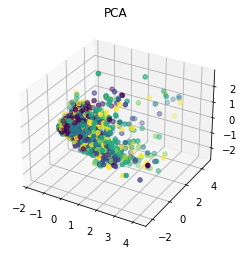

In [25]:
pca_data = np.column_stack((pca_data, df2_labels))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=df.Label)  # Adjust indices as per your number of components
plt.title('PCA')
plt.show()

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Instantiate t-SNE object with 2 components
tsne = TSNE(n_components=3, random_state=2023)

# Fit t-SNE to the one-hot encoded matrix
tsne_data = tsne.fit_transform(df_data3)

print(tsne_data.shape)


(1426, 3)


C:\Users\User\AppData\Local\Temp/ipykernel_364/3859799529.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, 'labels']= tsne_df.labels.astype('string')


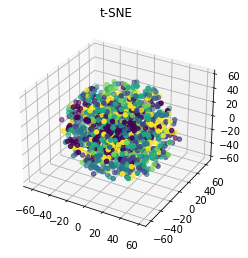

In [28]:
tsne_df = pd.DataFrame(
    np.column_stack((tsne_data, df2_labels)),
    columns = ['x', 'y', 'z', 'labels'])
tsne_df.loc[:, 'labels']= tsne_df.labels.astype('string')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2], c=df.Label)  # Adjust indices as per your number of components
plt.title('t-SNE')
plt.show()

In [114]:
final_table_columns = ['Label', 'name']
final_table_columns.extend(unique_mfi)
len(final_table_columns)


97

In [118]:
df_final = df2.drop(columns=[col for col in df2 if col not in final_table_columns])
df_final

,Label,name,"1,2-hexanediol",acrylates/c10-30 alkyl acrylate crosspolymer,adenosine,alcohol,alcohol denat,allantoin,aloe barbadensis leaf juice,alumina,...,tetrahexyldecyl ascorbate,titanium dioxide,titanium dioxide ci 77891,tocopherol,tocopheryl acetate,trehalose,triethoxycaprylylsilane,trisodium edta,water,xanthan gum
0,Cleanser,GENIUS Ultimate Anti-Aging Melting Cleanser,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,Cleanser,Hydrating Essence Toner,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,Cleanser,Multi-Perfecting Detoxifying Exfoliator,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Cleanser,Treatment Cleansing Foam,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
4,Cleanser,Treatment Enzyme Peel,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,Treatment,Rejuvenating Serum,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1422,Treatment,Resurfacing Serum,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1423,Treatment,Luminous Deep Hydration Firming Serum,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1424,Treatment,Snow Mushroom Water Serum,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [119]:
df_final.to_csv("onehot_ingr.csv", index=False)

In [29]:
from umap.parametric_umap import ParametricUMAP
import umap.plot


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\User\AppData\Local\Programs\Python\Python310\

In [36]:
df_data = df_data.drop(['water', 'no info'], axis=1)

In [50]:
reducer = ParametricUMAP(n_neighbors=6, n_components=3, min_dist=0.001)
umap_data = reducer.fit(df_data)

Epoch 1/10
432/432 [==============================] - 7s 12ms/step - loss: 0.6788
Epoch 2/10
432/432 [==============================] - 4s 10ms/step - loss: 0.6145
Epoch 3/10
432/432 [==============================] - 4s 10ms/step - loss: 0.6116
Epoch 4/10
432/432 [==============================] - 4s 10ms/step - loss: 0.6086
Epoch 5/10
432/432 [==============================] - 4s 10ms/step - loss: 0.6083
Epoch 6/10
432/432 [==============================] - 4s 10ms/step - loss: 0.6075
Epoch 7/10
432/432 [==============================] - 4s 10ms/step - loss: 0.6089
Epoch 8/10
432/432 [==============================] - 5s 11ms/step - loss: 0.6033
Epoch 9/10
432/432 [==============================] - 5s 11ms/step - loss: 0.6046
Epoch 10/10
432/432 [==============================] - 4s 10ms/step - loss: 0.6065


Text(0.5, 0, 'Epoch')

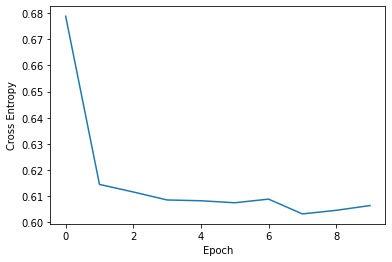

In [51]:
fig, ax = plt.subplots()
ax.plot(reducer._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')


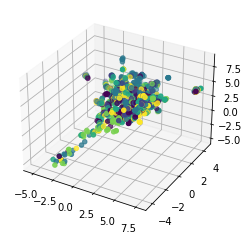

In [56]:
umap_data_small = reducer.embedding_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_data_small[:, 0], umap_data_small[:, 1], umap_data_small[:, 2], c=df.Label)  # Adjust indices as per your number of components
plt.show()

<AxesSubplot:>

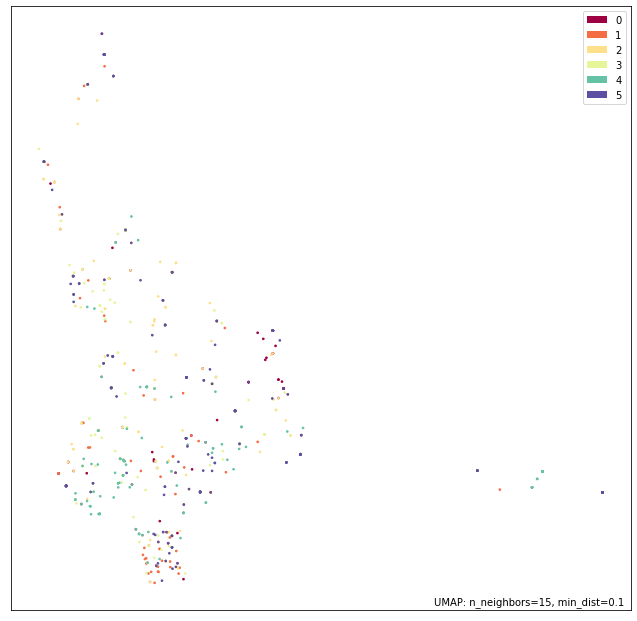

In [524]:
umap.plot.points(umap_data, df.Label)

In [469]:
umap_data.embedding_[2]

array([-3.2678695,  3.1711195], dtype=float32)

In [453]:
df_data

,"1,2-hexanediol",3-o-ethyl ascorbic acid,acacia decurrens flower wax,acer saccharum sugar maple extract,acetyl dipeptide-1 cetyl ester,acetyl glucosamine,acetyl hexapeptide-8,acetyl tetrapeptide-5,achillea millefolium extract,acrylamide/sodium acryloyldimethyltaurate copolymer,...,yeast extract,yeast extract/faex/extrait de levure,yellow 5 ci 19140,yellow 6 ci 15985,zea mays corn starch,zinc gluconate,zinc oxide,zinc pca,zinc sulfate,zingiber officinale ginger root extract
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1422,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1424,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
emb2 = ParametricUMAP(n_neighbors=6, n_components=3, min_dist=0.001)
umap2 = emb2.fit(df_data3)

Epoch 1/10
445/445 [==============================] - 6s 12ms/step - loss: 0.9435
Epoch 2/10
445/445 [==============================] - 5s 12ms/step - loss: 0.8738
Epoch 3/10
445/445 [==============================] - 5s 11ms/step - loss: 0.8659
Epoch 4/10
445/445 [==============================] - 5s 11ms/step - loss: 0.8642
Epoch 5/10
445/445 [==============================] - 5s 11ms/step - loss: 0.8597
Epoch 6/10
445/445 [==============================] - 5s 11ms/step - loss: 0.8633
Epoch 7/10
445/445 [==============================] - 5s 11ms/step - loss: 0.8642
Epoch 8/10
445/445 [==============================] - 5s 11ms/step - loss: 0.8633
Epoch 9/10
445/445 [==============================] - 5s 12ms/step - loss: 0.8605
Epoch 10/10
445/445 [==============================] - 5s 12ms/step - loss: 0.8650


Text(0.5, 0, 'Epoch')

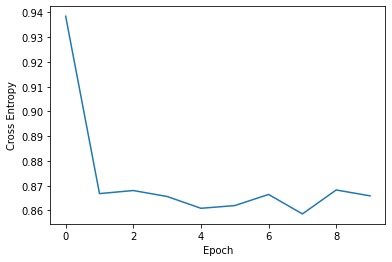

In [34]:
fig, ax = plt.subplots()
ax.plot(emb2._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

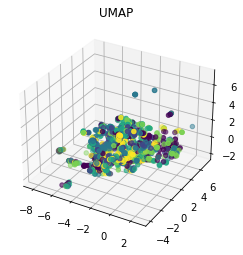

In [43]:
umap2 = emb2.embedding_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap2[:, 0], umap2[:, 1], umap2[:, 2], c=df.Label) 
plt.title('UMAP')
plt.show()

In [759]:
embedder = ParametricUMAP(n_neighbors=6, n_components=3, min_dist=0.001)
umap_all = embedder.fit(df_data)

Epoch 1/10
432/432 [==============================] - 12s 21ms/step - loss: 0.6844
Epoch 2/10
432/432 [==============================] - 9s 20ms/step - loss: 0.6113
Epoch 3/10
432/432 [==============================] - 9s 21ms/step - loss: 0.6079
Epoch 4/10
432/432 [==============================] - 9s 21ms/step - loss: 0.6082
Epoch 5/10
432/432 [==============================] - 8s 20ms/step - loss: 0.6078
Epoch 6/10
432/432 [==============================] - 8s 20ms/step - loss: 0.6064
Epoch 7/10
432/432 [==============================] - 8s 19ms/step - loss: 0.6044
Epoch 8/10
432/432 [==============================] - 8s 19ms/step - loss: 0.6063
Epoch 9/10
432/432 [==============================] - 8s 18ms/step - loss: 0.6035
Epoch 10/10
432/432 [==============================] - 8s 18ms/step - loss: 0.6013


Text(0.5, 0, 'Epoch')

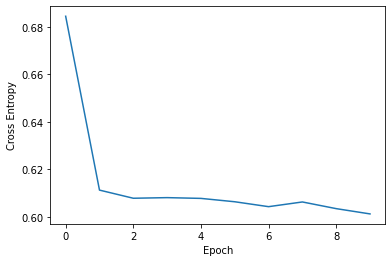

In [760]:
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

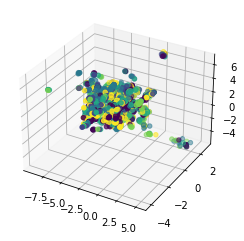

In [761]:
umap_data3 = embedder.embedding_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_data3[:, 0], umap_data3[:, 1], umap_data3[:, 2], c=df.Label) 
plt.show()

<AxesSubplot:>

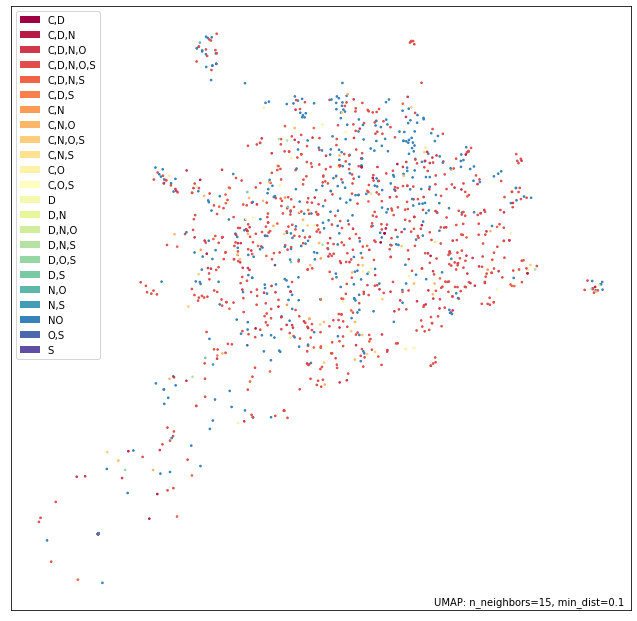

In [525]:
umap.plot.points(umap_all, df.skintype)

In [346]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Label'] = le.fit_transform(df['Label'])



<AxesSubplot:>

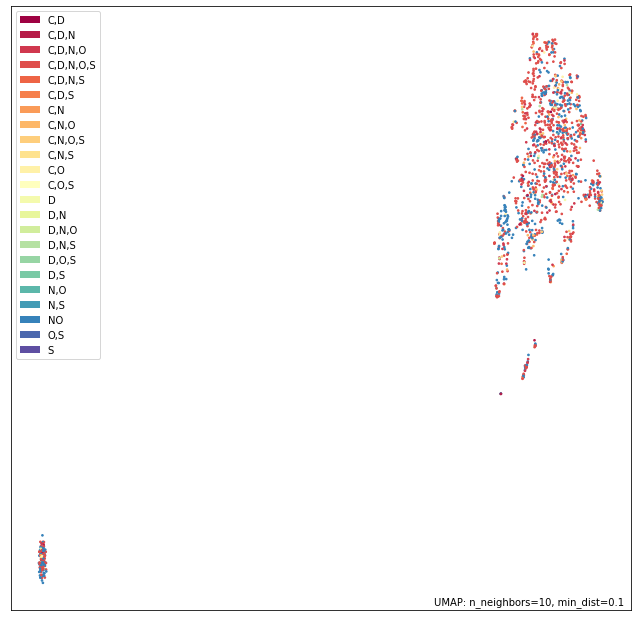

In [191]:
umap.plot.points(umap_data, labels=df.skintype)

In [192]:
umap_data1 = reducer.fit(df_data)


<AxesSubplot:>

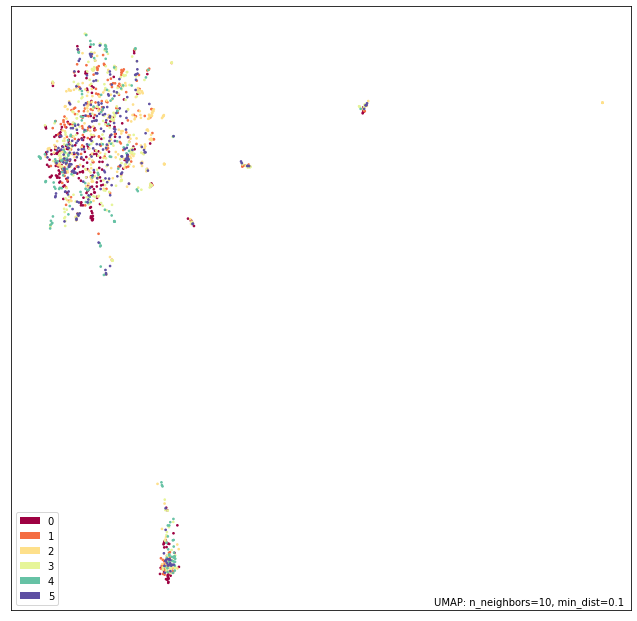

In [193]:
umap.plot.points(umap_data1, labels=df.Label)

<AxesSubplot:>

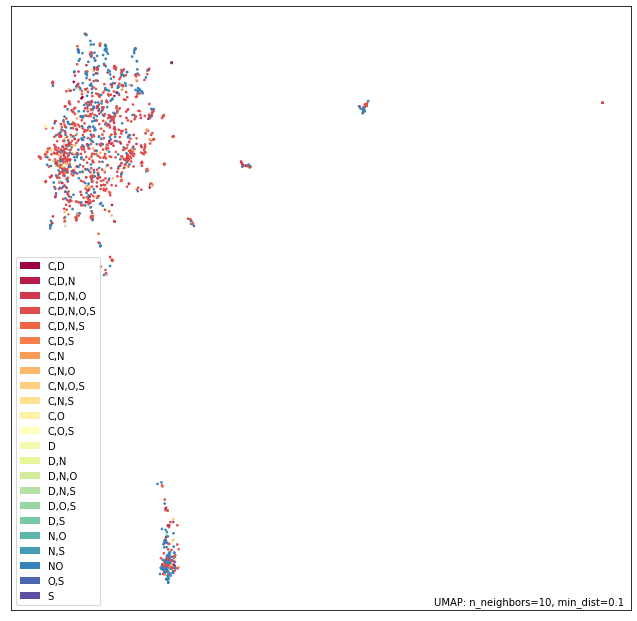

In [194]:
umap.plot.points(umap_data1, labels=df.skintype)

In [195]:
reducer3 = umap.UMAP(n_neighbors=10, n_components=3, min_dist=0.0001)
umap_data3 = reducer3.fit_transform(df_data2)

In [38]:
df_umap = df.drop(['ingredients'], axis=1)
reduced_feature_names = ['umap_comp_1', 'umap_comp_2', 'umap_comp_3']

# Add the reduced data as new columns to the original dataset
for i, feature_name in enumerate(reduced_feature_names):
    df_umap[feature_name] = umap2.embedding_[:, i]
df_umap.head()

,Label,brand,name,price,rank,Combination,Dry,Normal,Oily,Sensitive,skintype,umap_comp_1,umap_comp_2,umap_comp_3
0,0,ALGENIST,GENIUS Ultimate Anti-Aging Melting Cleanser,38,4.1,0,0,0,0,0,NO,-3.462126,-1.281736,-0.404654
1,0,ALGENIST,Hydrating Essence Toner,25,4.4,0,0,0,0,0,NO,-1.403818,-1.107007,2.699228
2,0,ALGENIST,Multi-Perfecting Detoxifying Exfoliator,38,4.6,0,0,0,0,0,NO,-2.836174,-1.236796,0.511404
3,0,AMOREPACIFIC,Treatment Cleansing Foam,50,4.5,1,0,1,1,0,"C,N,O",-4.772723,-1.295502,-0.937622
4,0,AMOREPACIFIC,Treatment Enzyme Peel,60,4.7,1,1,1,1,1,"C,D,N,O,S",-3.255179,-1.451754,-0.393702


In [39]:
df_umap.to_csv("umap_dataset.csv", index=False)

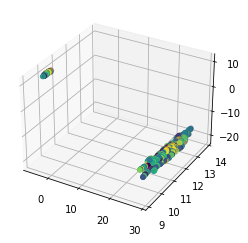

In [196]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_data3[:, 0], umap_data3[:, 1], umap_data3[:, 2], c=df.Label)  # Adjust indices as per your number of components
plt.show()

In [88]:
u = umap.UMAP(
    n_neighbors=6,
    min_dist=0.0,
    n_components=3,
    random_state=42,
).fit_transform(df_data2)

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Label'] = le.fit_transform(df['Label'])

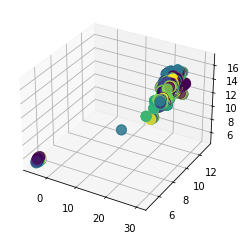

In [145]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0], u[:,1], u[:,2], c=df.Label, s=100)
